In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [2]:
housing = pd.read_csv("Ames_Housing_Price_Data.csv", index_col=0)

## Overall Quality

In [56]:
quality = housing.copy()

In [ ]:
#checking correlation between all features and target (sale price)
#overall quality highest correlated
#overall condition in the least 3 correlated

correlations = quality[quality.columns[1:]].corr()['SalePrice'][:]
correlations.sort_values(ascending=False)

In [57]:
sale_log = np.log10(quality['SalePrice'])

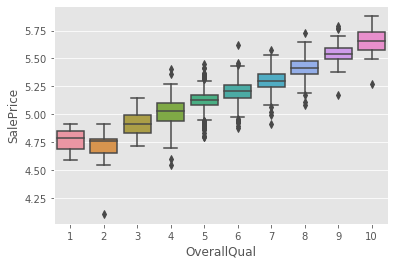

In [58]:
sns.boxplot(x='OverallQual', y=sale_log, data=housing)

In [59]:
only_quality = quality.filter(regex='Qual$|Qu$|QC$|Fence$|Type1$|Type2$')

In [ ]:
only_quality.isnull().sum(axis=0)

In [64]:
only_quality = only_quality.replace(np.nan, 0)

In [60]:
only_quality = only_quality.replace({"Po":1, "Fa":2, "TA":3, "Gd":4,\
                                     "Ex":5})

In [61]:
only_quality = only_quality.replace({"Unf":1, "LwQ":2,\
                                     "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6})

In [ ]:
only_quality.dtypes

In [62]:
only_quality = only_quality.drop('Fence', 1)

In [65]:
from sklearn.linear_model import LinearRegression
continuous_features = ['ExterQual', 'BsmtQual', 'BsmtFinType1',\
                       'BsmtFinType2', 'HeatingQC', 'KitchenQual',\
                       'FireplaceQu', 'GarageQual', 'PoolQC']
scores = {}
ols4 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                df2     = only_quality.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols4.fit(df2, feature)
                scores[feature_name] = ols4.score(df2, feature)    

Text(0.5, 1.0, '$R^2$ of a continuous feature against the other features')

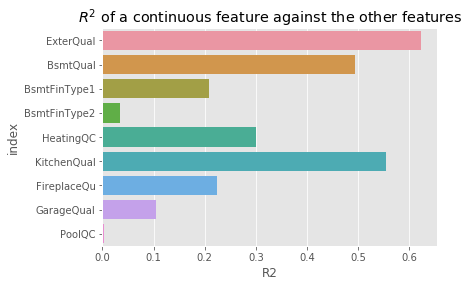

In [67]:
sns.barplot(x='R2', y='index', data=pd.DataFrame(scores, index=['R2'])\
            .T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')

In [68]:
only_quality[['OverallQual']+['ExterQual', 'BsmtQual', 'BsmtFinType1',\
                              'BsmtFinType2','HeatingQC','KitchenQual',\
                              'FireplaceQu','GarageQual','PoolQC']].corr()

,OverallQual,ExterQual,BsmtQual,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,PoolQC
OverallQual,1.000000,0.714140,0.622697,0.293822,-0.001032,0.441467,0.653820,0.466129,0.290338,0.026092
ExterQual,0.714140,1.000000,0.544637,0.258615,-0.013526,0.500442,0.697801,0.334071,0.207335,0.024435
BsmtQual,0.622697,0.544637,1.000000,0.440746,0.115469,0.393289,0.490160,0.289943,0.200196,-0.004101
BsmtFinType1,0.293822,0.258615,0.440746,1.000000,0.093043,0.167571,0.265460,0.124460,0.178601,-0.003119
BsmtFinType2,-0.001032,-0.013526,0.115469,0.093043,1.000000,-0.022877,-0.009246,-0.013900,0.071122,0.017884
HeatingQC,0.441467,0.500442,0.393289,0.167571,-0.022877,1.000000,0.481421,0.195907,0.128139,-0.006205
KitchenQual,0.653820,0.697801,0.490160,0.265460,-0.009246,0.481421,1.000000,0.314742,0.201136,0.031706
FireplaceQu,0.466129,0.334071,0.289943,0.124460,-0.013900,0.195907,0.314742,1.000000,0.207640,0.020756
GarageQual,0.290338,0.207335,0.200196,0.178601,0.071122,0.128139,0.201136,0.207640,1.000000,0.028301
PoolQC,0.026092,0.024435,-0.004101,-0.003119,0.017884,-0.006205,0.031706,0.020756,0.028301,1.000000


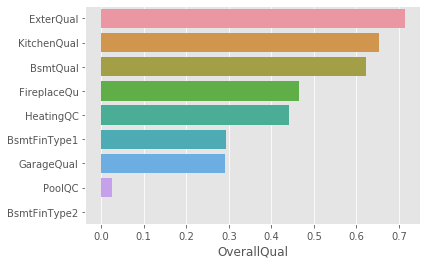

In [69]:
features = ['ExterQual','BsmtQual','BsmtFinType1','BsmtFinType2',\
            'HeatingQC','KitchenQual','FireplaceQu','GarageQual','PoolQC']
corr = only_quality[['OverallQual'] + features].corr()

corr = corr.sort_values('OverallQual', ascending=False)
sns.barplot( corr.OverallQual[1:], corr.index[1:], orient='h')

In [70]:
X_quality = only_quality.copy()

In [71]:
X_quality = X_quality.drop(['OverallQual','BsmtFinType2','PoolQC'], 1)

In [72]:
y_quality = only_quality['OverallQual']

In [73]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split\
(X_quality, y_quality, test_size=0.3, random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression 

ols2 = LinearRegression()
ols2.fit(X_train2, y_train2)
print("R^2 for train set: %f" %ols2.score(X_train2, y_train2))

print('-'*50)

print("R^2 for test  set: %f" %ols2.score(X_test2, y_test2))

R^2 for train set: 0.658504
--------------------------------------------------
R^2 for test  set: 0.653943


In [75]:
y_sale = np.log10(housing['SalePrice'])

In [76]:
X_train3, X_test3, y_train3, y_test3 = train_test_split\
(X_quality, y_sale, test_size=0.3, random_state=42)

In [78]:
ols3 = LinearRegression()
ols3.fit(X_train3, y_train3)
print("R^2 for train set: %f" %ols3.score(X_train3, y_train3))

print('-'*50)

print("R^2 for test  set: %f" %ols3.score(X_test3, y_test3))

R^2 for train set: 0.673964
--------------------------------------------------
R^2 for test  set: 0.719691


## Overall Condition

In [ ]:
condition = housing.copy()

In [98]:
only_condition = only_quality = quality.filter(regex='Cond$')

In [99]:
only_condition.head()

,OverallCond,ExterCond,BsmtCond,GarageCond
1,6,TA,TA,TA
2,5,TA,TA,TA
3,9,TA,TA,Po
4,8,Gd,TA,TA
5,6,TA,TA,TA


In [105]:
only_condition = only_condition.replace(np.nan, 0)

In [100]:
only_condition = only_condition.replace({"Po":1, "Fa":2, "TA":3, "Gd":4,\
                                     "Ex":5})

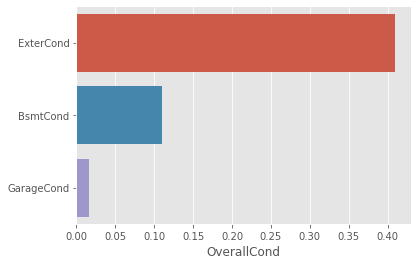

In [113]:
features = ['ExterCond','BsmtCond','GarageCond']
corr = only_condition[['OverallCond'] + features].corr()

corr = corr.sort_values('OverallCond', ascending=False)
sns.barplot( corr.OverallCond[1:], corr.index[1:], orient='h')

## Feature Engineering: Curb Appeal

In [3]:
curb = housing.copy()

In [4]:
curb['MasVnrArea'].replace(to_replace=0, value=np.nan, inplace=True)

In [5]:
curb['MasVnrArea_bin'] = pd.qcut(curb['MasVnrArea'], q=5)

In [6]:
curb['MasVnrArea_vals'] = pd.cut(x=curb['MasVnrArea'],\
                                 bins=[0.999, 104.0, 169.4, 242.0, 363.6,\
                                       1600], labels=[1,2,3,4,5])

In [7]:
curb['LotFrontage'].replace(to_replace=0, value=np.nan, inplace=True)

In [8]:
curb['LotFrontage_bin'] = pd.qcut(curb['LotFrontage'], q=5)

In [9]:
curb['LotFrontage_vals'] = pd.cut(x=curb['LotFrontage'],\
                                 bins=[20.999, 52.0, 62.0, 72.0, 82.0,\
                                       313.0], labels=[1,2,3,4,5])

In [10]:
curb = curb.replace(np.nan, 0)

In [11]:
curb = curb.replace({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

In [12]:
print(curb.groupby('Street')['SalePrice'].mean()\
      .sort_values(ascending=False))

Street
Pave    178295.719455
Grvl    117382.900000
Name: SalePrice, dtype: float64


In [13]:
curb['Street'] = curb['Street'].replace({"Grvl":2, "Pave":4})

In [14]:
print(curb.groupby('LotShape')['SalePrice'].mean()\
      .sort_values(ascending=False))

LotShape
IR2    226790.633803
IR3    209374.230769
IR1    206628.735673
Reg    160817.951859
Name: SalePrice, dtype: float64


In [15]:
curb['LotShape'] = curb['LotShape'].replace\
({"Reg":1.5, "IR1":3, "IR3":3, "IR2":4.5})

In [16]:
print(curb.groupby('LandContour')['SalePrice'].mean()\
      .sort_values(ascending=False))

LandContour
HLS    239313.687500
Low    201157.692308
Lvl    176158.613607
Bnk    150282.463158
Name: SalePrice, dtype: float64


In [17]:
curb['LandContour'] = curb['LandContour'].replace\
({"Bnk":1.25, "Lvl":2.5, "Low":3.75, "HLS":5})

In [18]:
print(curb.groupby('LotConfig')['SalePrice'].mean()\
      .sort_values(ascending=False))

LotConfig
CulDSac    219371.152439
FR3        189638.461538
Corner     178015.701595
Inside     174649.191941
FR2        171979.358974
Name: SalePrice, dtype: float64


In [19]:
curb['LotConfig'] = curb['LotConfig'].replace\
({"FR2":1, "Inside":2, "Corner":3, "FR3":4, "CulDSac":5})

In [20]:
print(curb.groupby('LandSlope')['SalePrice'].mean()\
      .sort_values(ascending=False))

LandSlope
Sev    216496.153846
Mod    203104.128440
Gtl    176745.739626
Name: SalePrice, dtype: float64


In [21]:
curb['LandSlope'] = curb['LandSlope'].replace\
({"Gtl":1.5, "Mod":3, "Sev":5})

In [22]:
print(curb.groupby('RoofStyle')['SalePrice'].mean()\
      .sort_values(ascending=False))

RoofStyle
Shed       221500.000000
Hip        215765.198732
Flat       188843.750000
Mansard    178447.900000
Gable      169522.345799
Gambrel    144355.555556
Name: SalePrice, dtype: float64


In [23]:
curb['RoofStyle'] = curb['RoofStyle'].replace\
({"Gambrel":1, "Gable":2, "Mansard":3, "Flat":4,"Hip":5, "Shed":5})

In [24]:
print(curb.groupby('RoofMatl')['SalePrice'].mean()\
      .sort_values(ascending=False))

RoofMatl
WdShngl    374357.142857
Membran    241500.000000
WdShake    232375.000000
Tar&Grv    185166.666667
Metal      180000.000000
CompShg    177288.847484
Roll       137000.000000
Name: SalePrice, dtype: float64


In [25]:
curb['RoofMatl'] = curb['RoofMatl'].replace\
({"Roll":1, "CompShg":2, "Metal":2, "Tar&Grv":2.5,\
  "WdShake":3, "Membran":4, "WdShngl":5})

In [26]:
print(curb.groupby('Exterior1st')['SalePrice'].mean()\
      .sort_values(ascending=False))

Exterior1st
ImStucc    262000.000000
PreCast    260000.000000
VinylSd    213723.040323
CemntBd    213163.556701
BrkFace    188901.875000
Plywood    170596.922680
HdBoard    162253.906250
BrkComm    153000.000000
MetalSd    152843.665848
Stucco     149468.351351
WdShing    148886.647059
Wd Sdng    147727.379221
AsbShng    106998.529412
CBlock      93250.000000
AsphShn     91187.500000
Name: SalePrice, dtype: float64


In [27]:
curb['Exterior1st'] = curb['Exterior1st'].replace\
({"AsphShn":1, "CBlock":1, "AsbShng":2, "Wd Sdng":2.5,\
  "WdShing":2.5, "Stucco":2.5, "MetalSd":3, "BrkComm":3, "HdBoard":3.5,\
  "Plywood":4, "BrkFace":4, "CemntBd":4.5, "VinylSd":4.5, "PreCast":5,\
  "ImStucc":5})

In [29]:
curb['curb_appeal']= (curb['MasVnrArea_vals'] + curb['LotFrontage_vals']\
+ curb['Street'] + curb['LotShape'] + curb['LandContour'] + curb['LotConfig']\
+ curb['LandSlope'] + curb['RoofStyle'] + curb['RoofMatl'] + curb['Exterior1st']\
+ curb['ExterQual'] + curb['ExterCond'])/12

In [30]:
target = np.log10(curb['SalePrice'])

In [31]:
independent = curb[['curb_appeal']]

In [32]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split\
(independent, target, test_size=0.3, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression 

ols1 = LinearRegression()
ols1.fit(X_train1, y_train1)
print("R^2 for train set: %f" %ols1.score(X_train1, y_train1))

print('-'*50)

print("R^2 for test  set: %f" %ols1.score(X_test1, y_test1))

R^2 for train set: 0.412844
--------------------------------------------------
R^2 for test  set: 0.457090


In [35]:
target.corr(curb['curb_appeal'])

0.6542807652928291

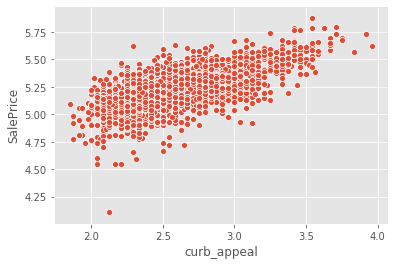

In [37]:
sns.scatterplot(x=curb['curb_appeal'], y=target, data=curb)

In [90]:
curb_only = curb[['MasVnrArea_vals','LotFrontage_vals','Street',\
                  'LotShape','LandContour','LotConfig','LandSlope',\
                  'RoofStyle','RoofMatl','Exterior1st','ExterQual',\
                  'ExterCond']]

In [93]:
from sklearn.linear_model import LinearRegression
continuous_features = ['MasVnrArea_vals','LotFrontage_vals',\
                       'Street','LotShape','LandContour','LotConfig',\
                       'LandSlope','RoofStyle','RoofMatl','Exterior1st',\
                       'ExterQual','ExterCond']
scores = {}
ols = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                df3     = curb_only.copy()
                feature = df3[feature_name].copy()
                df3.drop(feature_name, axis=1, inplace=True)
                ols.fit(df3, feature)
                scores[feature_name] = ols.score(df3, feature)

Text(0.5, 1.0, '$R^2$ of a continuous feature against the other features')

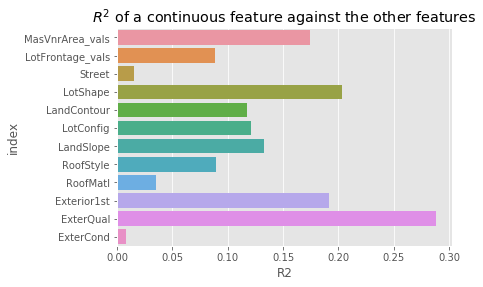

In [94]:
sns.barplot(x='R2', y='index', data=pd.DataFrame(scores, index=['R2'])\
            .T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')